## Importing Packages

In [ ]:
import pandas as pd
import numpy as np
from WeeklyTrial import WeeklyTrial

## Constructor Inputs for First Expiration

In [ ]:
expiration = '2010-06-11'
last_trade_date = '2010-06-11'
execution = '2010-06-04'
universe = ['DIA','IWM','QQQ','SPY']
leg_max = 5 # the maximum number of longs and shorts (for the initial iteration, since I am focused on a small universe this won't matter)
delta_long = 0.1 # delta of long strangles
delta_short = 0.1 # delta of short strangles
premium_budget = 2000 # amount of absolute premium traded (if you trade n underlyings, for each underlying you will buy/sell premium_budget/n premium)

In [ ]:
test = WeeklyTrial()
test.calc_all()

2010-06-11


In [ ]:
test.underlyings

,underlying,direction,expiration,execution,size,quantity,pnl_bid_ask,pnl_mid
0,IWM,1,2010-06-11,2010-06-04,4.0,4.0,-343.88,-307.88
1,SPY,1,2010-06-11,2010-06-04,3.0,3.0,-396.33,-357.33
2,QQQ,-1,2010-06-11,2010-06-04,6.0,-6.0,163.32,163.32
3,DIA,-1,2010-06-11,2010-06-04,3.0,-3.0,202.68,241.68


## Reading-In All Weekly Expirations

In [ ]:
df_expirations = pd.read_csv('../data/spy_weekly_chains_20100604_20181228.csv')
df_expirations

,underlying,monthly,expiration,last_trade_date,execution
0,SPY,False,2010-06-11,2010-06-11,2010-06-04
1,SPY,True,2010-06-19,2010-06-18,2010-06-11
2,SPY,False,2010-06-25,2010-06-25,2010-06-18
3,SPY,False,2010-07-02,2010-07-02,2010-06-25
4,SPY,False,2010-07-09,2010-07-09,2010-07-02
...,...,...,...,...,...
442,SPY,False,2018-11-30,2018-11-30,2018-11-23
443,SPY,False,2018-12-07,2018-12-07,2018-11-30
444,SPY,False,2018-12-14,2018-12-14,2018-12-07
445,SPY,True,2018-12-21,2018-12-21,2018-12-14


## Calculate All Trials for a Strategy

The `strategy` is going to be held in a `Dict`, later I will build a class around this concept.

In [ ]:
%%time
strategy = {}
for ix, row in df_expirations.iterrows():
    expiration = row['expiration']
    last_trade_date = row['last_trade_date']
    execution = row['execution']
    universe = ['DIA','IWM','QQQ','SPY']
    leg_max = 5
    delta_long = 0.1
    delta_short = 0.1
    premium_budget = 2000

    # there is bad data for this date
    if expiration == '2015-12-19':
        continue
        
    wt = WeeklyTrial( expiration = expiration,
                 last_trade_date = last_trade_date,
                 execution = execution,
                 universe = universe,
                 leg_max = leg_max,
                 delta_long = delta_long, # delta of long strangles
                 delta_short = delta_short, # delta of short strangles
                 premium_budget = premium_budget)

    wt.calc_all()
    strategy[expiration] = wt
    #print(f'{expiration} {last_trade_date} {execution}')

2010-06-11
2010-06-19
2010-06-25
2010-07-02
2010-07-09
2010-07-17
2010-07-23
2010-07-30
2010-08-06
2010-08-13
2010-08-21
2010-08-27
2010-09-03
2010-09-10
2010-09-18
2010-09-24
2010-10-01
2010-10-08
2010-10-16
2010-10-22
2010-10-29
2010-11-05
2010-11-12
2010-11-20
2010-11-26
2010-12-03
2010-12-10
2010-12-18
2010-12-23
2010-12-31
2011-01-07
2011-01-14
2011-01-22
2011-01-28
2011-02-04
2011-02-11
2011-02-19
2011-02-25
2011-03-04
2011-03-11
2011-03-19
2011-03-25
2011-04-01
2011-04-08
2011-04-16
2011-04-21
2011-04-29
2011-05-06
2011-05-13
2011-05-21
2011-05-27
2011-06-03
2011-06-10
2011-06-18
2011-06-24
2011-07-01
2011-07-08
2011-07-16
2011-07-22
2011-07-29
2011-08-05
2011-08-12
2011-08-20
2011-08-26
2011-09-02
2011-09-09
2011-09-17
2011-09-23
2011-09-30
2011-10-07
2011-10-14
2011-10-22
2011-10-28
2011-11-04
2011-11-11
2011-11-19
2011-11-25
2011-12-02
2011-12-09
2011-12-17
2011-12-23
2011-12-30
2012-01-06
2012-01-13
2012-01-21
2012-01-27
2012-02-03
2012-02-10
2012-02-18
2012-02-24
2012-03-02

In [ ]:
test_exp = '2010-08-06'
strategy[test_exp]

<WeeklyTrial.WeeklyTrial>

In [ ]:
strategy[test_exp].trial_daily_pnls

,trade_date,dollar_pnl_bid_ask,dollar_pnl_mid
0,2010-07-30,-710.00,-355.00
1,2010-08-02,-778.11,-778.11
2,2010-08-03,290.79,290.79
3,2010-08-04,-88.14,-88.14
4,2010-08-05,361.41,361.41
5,2010-08-06,320.76,320.76


In [ ]:
daily_pnls = []
for ix_expiration in strategy.keys():
    daily_pnls.append(strategy[ix_expiration].trial_daily_pnls)
df_daily_pnls = pd.concat(daily_pnls)
df_daily_pnls#.head(10)

,trade_date,dollar_pnl_bid_ask,dollar_pnl_mid
0,2010-06-04,-836.00,-418.00
1,2010-06-07,229.78,229.78
2,2010-06-08,-82.10,-82.10
3,2010-06-09,83.08,83.08
4,2010-06-10,21.60,21.60
...,...,...,...
0,2018-12-21,-237.00,-118.50
1,2018-12-24,-13.54,-13.54
2,2018-12-26,291.09,291.09
3,2018-12-27,-24.07,-24.07


In [ ]:
df_strategy_pnl = \
    (
    df_daily_pnls
        .groupby(['trade_date'])[['dollar_pnl_bid_ask', 'dollar_pnl_mid']].sum()
        .reset_index()
        .assign(cum_pnl_bid_ask = lambda df: df['dollar_pnl_bid_ask'].cumsum())
        .assign(cum_pnl_mid = lambda df: df['dollar_pnl_mid'].cumsum())
        .assign(highwater = lambda df: df['cum_pnl_mid'].cummax())
        .assign(drawdown = lambda df: df['cum_pnl_mid'] - df['highwater'])
    )
df_strategy_pnl

,trade_date,dollar_pnl_bid_ask,dollar_pnl_mid,cum_pnl_bid_ask,cum_pnl_mid,highwater,drawdown
0,2010-06-04,-836.00,-418.00,-836.00,-418.00,-418.00,0.00
1,2010-06-07,229.78,229.78,-606.22,-188.22,-188.22,0.00
2,2010-06-08,-82.10,-82.10,-688.32,-270.32,-188.22,-82.10
3,2010-06-09,83.08,83.08,-605.24,-187.24,-187.24,0.00
4,2010-06-10,21.60,21.60,-583.64,-165.64,-165.64,0.00
...,...,...,...,...,...,...,...
2150,2018-12-21,12.60,131.10,-55487.60,24325.40,24945.90,-620.50
2151,2018-12-24,-13.54,-13.54,-55501.14,24311.86,24945.90,-634.04
2152,2018-12-26,291.09,291.09,-55210.05,24602.95,24945.90,-342.95
2153,2018-12-27,-24.07,-24.07,-55234.12,24578.88,24945.90,-367.02


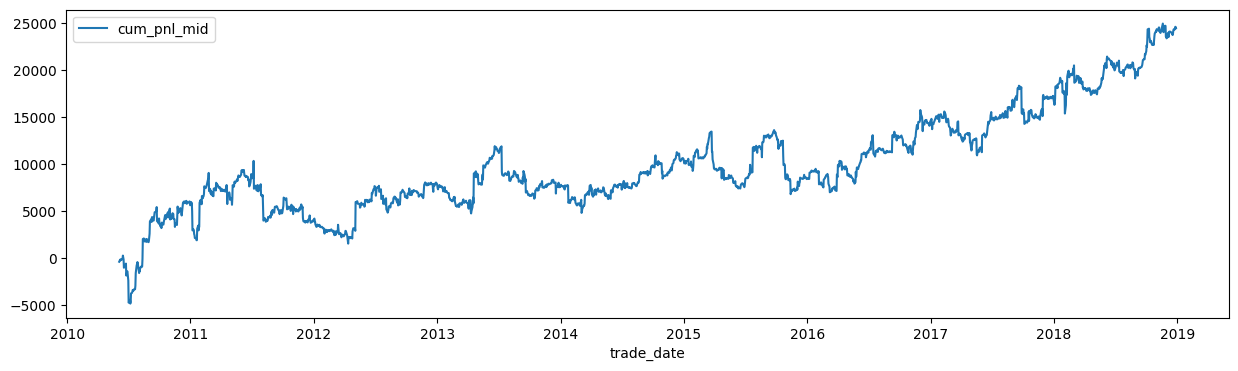

In [ ]:
#df_strategy_pnl.plot(x='trade_date', y=['cum_pnl_mid', 'cum_pnl_bid_ask'], figsize=(15, 4))
df_strategy_pnl.plot(x='trade_date', y=['cum_pnl_mid'], figsize=(15, 4));

In [ ]:
strategy[test_exp].underlyings

,underlying,direction,expiration,execution,size,quantity,pnl_bid_ask,pnl_mid
0,IWM,1,2010-08-06,2010-07-30,37.0,37.0,-903.17,-718.17
1,SPY,-1,2010-08-06,2010-07-30,34.0,-34.0,299.88,469.88


In [ ]:
strategy[test_exp].otm_options

{'IWM':    underlying  expiration    cp  strike  trade_date    upx   bid   ask    mid   
 0         IWM  2010-08-06   put    58.0  2010-07-30  65.02  0.02  0.08  0.050  \
 1         IWM  2010-08-06   put    59.0  2010-07-30  65.02  0.04  0.10  0.070   
 2         IWM  2010-08-06   put    60.0  2010-07-30  65.02  0.10  0.15  0.125   
 3         IWM  2010-08-06   put    61.0  2010-07-30  65.02  0.13  0.17  0.150   
 4         IWM  2010-08-06   put    62.0  2010-07-30  65.02  0.21  0.28  0.245   
 5         IWM  2010-08-06   put    63.0  2010-07-30  65.02  0.35  0.43  0.390   
 6         IWM  2010-08-06   put    64.0  2010-07-30  65.02  0.59  0.68  0.635   
 7         IWM  2010-08-06   put    65.0  2010-07-30  65.02  0.94  1.06  1.000   
 8         IWM  2010-08-06  call    66.0  2010-07-30  65.02  0.52  0.62  0.570   
 9         IWM  2010-08-06  call    67.0  2010-07-30  65.02  0.22  0.32  0.270   
 10        IWM  2010-08-06  call    68.0  2010-07-30  65.02  0.09  0.15  0.120   
 11      

In [ ]:
strategy[test_exp].chain_history

,underlying,expiration,trade_date,implied_forward,d2x,swap_rate_bid,swap_rate_ask,swap_rate_mid,ticker,week_num,week_start,week_end,close_to_close,vol_prem_forecast
0,IWM,2010-08-06,2010-07-30,65.0280,5,0.2803,0.3164,0.2989,IWM,8,2010-07-26,2010-07-30,0.223483,0.075417
1,QQQ,2010-08-06,2010-07-30,45.8375,5,0.1841,0.1972,0.1907,QQQ,8,2010-07-26,2010-07-30,0.108105,0.082595
2,SPY,2010-08-06,2010-07-30,110.4250,5,0.2069,0.2178,0.2124,SPY,8,2010-07-26,2010-07-30,0.104360,0.108040


In [ ]:
strategy[test_exp].strangle_trades

{'IWM':   underlying  expiration    cp  strike  trade_date    upx   bid   ask   mid   
 0        IWM  2010-08-06   put    61.0  2010-07-30  65.02  0.13  0.17  0.15  \
 1        IWM  2010-08-06  call    68.0  2010-07-30  65.02  0.09  0.15  0.12   
 
    implied_vol   delta  target_delta  abs_delta_diff  direction  size   
 0       0.3550  0.0962           0.1          0.0038          1  37.0  \
 1       0.2537  0.1088           0.1          0.0088          1  37.0   
 
    quantity  
 0      37.0  
 1      37.0  ,
 'SPY':   underlying  expiration    cp  strike  trade_date     upx   bid   ask   mid   
 0        SPY  2010-08-06   put   105.0  2010-07-30  110.27  0.15  0.21  0.18  \
 1        SPY  2010-08-06  call   114.0  2010-07-30  110.27  0.09  0.13  0.11   
 
    implied_vol   delta  target_delta  abs_delta_diff  direction  size   
 0       0.2712  0.0905           0.1          0.0095         -1  34.0  \
 1       0.1682  0.0913           0.1          0.0087         -1  34.0   
 
    q

In [ ]:
strategy[test_exp].strangle_histories

{'IWM':   underlying  expiration    cp  strike  trade_date  d2x     upx   bid   ask   
 0        IWM  2010-08-06   put    61.0  2010-07-30    5  65.020  0.13  0.17  \
 1        IWM  2010-08-06   put    61.0  2010-08-02    4  66.151  0.03  0.06   
 2        IWM  2010-08-06   put    61.0  2010-08-03    3  65.620  0.02  0.05   
 3        IWM  2010-08-06   put    61.0  2010-08-04    2  66.310  0.00  0.03   
 4        IWM  2010-08-06   put    61.0  2010-08-05    1  65.530  0.02  0.03   
 5        IWM  2010-08-06   put    61.0  2010-08-06    0  65.140  0.00  0.00   
 0        IWM  2010-08-06  call    68.0  2010-07-30    5  65.020  0.09  0.15   
 1        IWM  2010-08-06  call    68.0  2010-08-02    4  66.151  0.13  0.17   
 2        IWM  2010-08-06  call    68.0  2010-08-03    3  65.620  0.06  0.09   
 3        IWM  2010-08-06  call    68.0  2010-08-04    2  66.310  0.06  0.06   
 4        IWM  2010-08-06  call    68.0  2010-08-05    1  65.530  0.01  0.03   
 5        IWM  2010-08-06  call  

In [ ]:
underlyings = []
for ix_expiration in strategy.keys():
    underlyings.append(strategy[ix_expiration].underlyings)
df_underlyings = pd.concat(underlyings)
df_underlyings

,underlying,direction,expiration,execution,size,quantity,pnl_bid_ask,pnl_mid
0,IWM,1,2010-06-11,2010-06-04,14.0,14.0,-597.10,-485.10
1,SPY,1,2010-06-11,2010-06-04,8.0,8.0,-432.16,-356.16
2,QQQ,-1,2010-06-11,2010-06-04,14.0,-14.0,190.68,260.68
3,DIA,-1,2010-06-11,2010-06-04,10.0,-10.0,285.70,445.70
0,QQQ,1,2010-06-19,2010-06-11,25.0,25.0,-910.75,-910.75
...,...,...,...,...,...,...,...,...
3,IWM,-1,2018-12-21,2018-12-14,10.0,-10.0,-824.70,-804.70
0,QQQ,1,2018-12-28,2018-12-21,8.0,8.0,259.84,303.84
1,DIA,1,2018-12-28,2018-12-21,5.0,5.0,421.70,459.20
2,IWM,-1,2018-12-28,2018-12-21,9.0,-9.0,-378.63,-351.63


In [ ]:
df_underlyings['size'].sum() * 2

71904.0

In [ ]:
df_strategy_pnl['cum_pnl_bid_ask'].iloc[-1] / (df_underlyings['size'].sum() * 2) 

-0.7700070927903864

In [ ]:
df_strategy_pnl['cum_pnl_mid'].iloc[-1] / (df_underlyings['size'].sum() * 2)

0.33998678793947484

In [ ]:
(df_strategy_pnl['dollar_pnl_mid'].mean() / df_strategy_pnl['dollar_pnl_mid'].std()) * np.sqrt(252)

0.44828198092522004

In [ ]:
np.quantile(df_strategy_pnl['dollar_pnl_mid'], 0.01)

-1271.7158000000002

In [ ]:
df_strategy_pnl['drawdown'].min()

-8809.01